In [1]:
import pandas as pd
import numpy as np

In [2]:
hotels = pd.read_csv('data/hotels.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


Copy city center location data from Wikipedia.

In [4]:
display(hotels['reviewer_score'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 386803 entries, 0 to 386802
Series name: reviewer_score
Non-Null Count   Dtype  
--------------   -----  
386803 non-null  float64
dtypes: float64(1)
memory usage: 3.0 MB


None

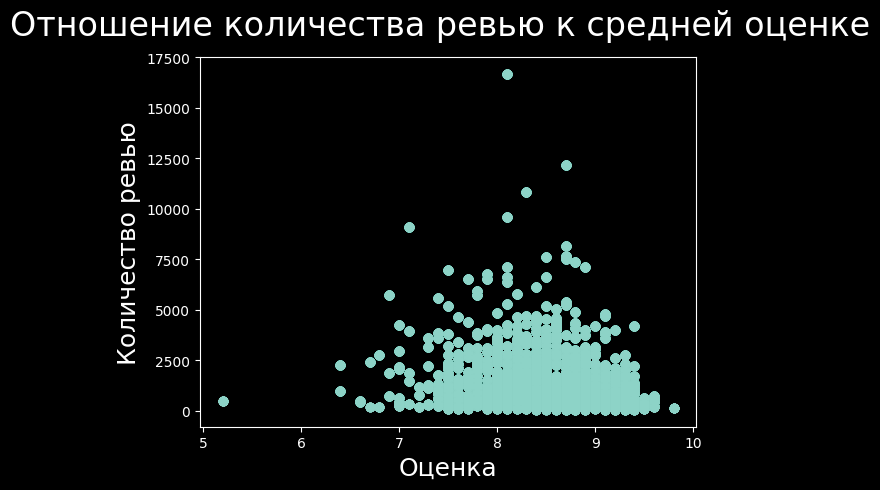

In [5]:
import matplotlib.pyplot as plt

fig = plt.scatter(
    data=hotels,
    x='average_score',
    y='total_number_of_reviews')
plt.suptitle('Отношение количества ревью к средней оценке', fontsize=24)
plt.xlabel('Оценка', fontsize=18)
plt.ylabel('Количество ревью', fontsize=18)
plt.show(fig)

#display(hotels[hotels['reviewer_score']<3.4])

In [6]:
hotels['negative_review'] = hotels['negative_review'].str.strip()
hotels['positive_review'] = hotels['positive_review'].str.strip()

In [7]:
# display(hotels['positive_review'].value_counts())
# display(hotels['negative_review'].value_counts())

In [8]:
print(hotels['hotel_address'][1])

130 134 Southampton Row Camden London WC1B 5AF United Kingdom


**review_score to category**

In [9]:
counter = 0

average_score_preserved_mapper = dict()

for i in sorted(set(hotels['average_score'])):
    average_score_preserved_mapper.update({i:counter})
    counter += 1

print(average_score_preserved_mapper)

{5.2: 0, 6.4: 1, 6.6: 2, 6.7: 3, 6.8: 4, 6.9: 5, 7.0: 6, 7.1: 7, 7.2: 8, 7.3: 9, 7.4: 10, 7.5: 11, 7.6: 12, 7.7: 13, 7.8: 14, 7.9: 15, 8.0: 16, 8.1: 17, 8.2: 18, 8.3: 19, 8.4: 20, 8.5: 21, 8.6: 22, 8.7: 23, 8.8: 24, 8.9: 25, 9.0: 26, 9.1: 27, 9.2: 28, 9.3: 29, 9.4: 30, 9.5: 31, 9.6: 32, 9.8: 33}


In [10]:
hotels['average_score'] = hotels['average_score'].replace(average_score_preserved_mapper)
hotels['average_score'] = hotels['average_score'].astype(int)

**Take both city and country from address**

In [11]:
# from collections import deque

# countrified = pd.DataFrame()

# def countrifier(string):
#     cut = deque(string.split()[-5:])
#     country = cut[-1]
#     city = cut[-2]
#     if country == 'Kingdom':
#         country = 'United Kingdom'
#         city = cut[0]
#     return pd.Series({'country': country, 'city': city})

# hotels[['country', 'city']] = hotels['hotel_address'].apply(countrifier)
# display(hotels[['country', 'city']].describe())

The resulting code proven to be useless as each country only have one city, so they are twin couples without variations.

In [12]:
from collections import deque

get_city = pd.DataFrame()

def get_city(string):
    cut = deque(string.split()[-5:])
    city = cut[-2]
    if cut[-1] == 'Kingdom':
        city = cut[0]
    return pd.Series(city)

hotels['city'] = hotels['hotel_address'].apply(get_city)
display(hotels[['city']].describe())

,city
count,386803
unique,6
top,London
freq,196774


In [13]:
display(hotels['city'].value_counts())

London       196774
Barcelona     45132
Paris         44830
Amsterdam     43006
Vienna        29178
Milan         27883
Name: city, dtype: int64

In [15]:
coord_dict = {'London': [51.507222, -0.1275],
 'Barcelona': [41.383333, 2.183333],
 'Paris': [48.856613, 2.352222],
 'Amsterdam': [52.366667, 4.9],
 'Vienna': [48.2, 16.366667],
 'Milan': [45.466944, 9.19]}

def coord_diff(city, lat, lng):
    if city in coord_dict:
        def_crd = coord_dict.get(city)

    lat_diff = def_crd[0] - lat
    lng_diff = def_crd[1] - lng
    return pd.Series([lat_diff, lng_diff])


hotels[['lat_diff','lng_diff']] = hotels.apply(lambda x: coord_diff(x['city'], x['lat'], x['lng']), axis=1)


<AxesSubplot:>

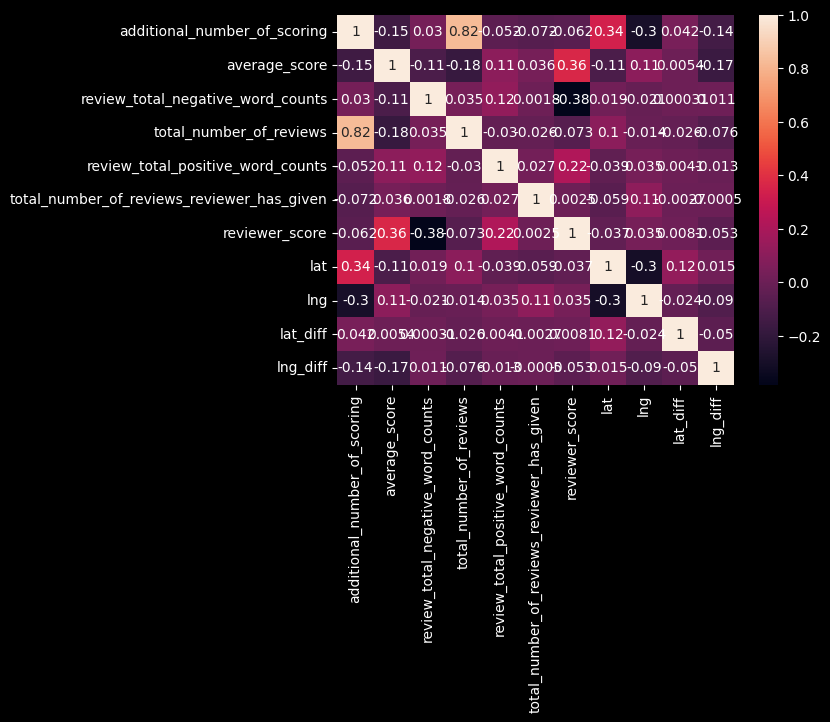

In [16]:
import seaborn as sns
import matplotlib
%matplotlib inline
sns.heatmap(hotels.corr(), annot = True)

Как мы видим, Страна == Город для всего датафрейма.

In [17]:
def citifier(string):
    cut = string.split()[::-1]

    country = cut[1]

    country = country[0]

    if country == 'Kingdom':
        city = cut[3:]
    else: city = cut[2:]
    
    city = city[0]
    
    return city

hotels['hotel_city'] = hotels['hotel_address'].apply(citifier)

display(hotels['hotel_city'].value_counts())

1010     9320
20124    8803
75008    8284
08002    7614
75001    4120
         ... 
1230       17
JW         16
20141      13
7DD         9
92120       5
Name: hotel_city, Length: 566, dtype: int64

In [18]:
def ws_cutter(string):
    string = string[1:-1]
    return(string)

hotels['reviewer_nationality'] =\
    hotels['reviewer_nationality'].apply(ws_cutter)

In [19]:
# hotels['is_homeland'] = (hotels['country']==hotels['reviewer_nationality'])
# comp_pd = pd.DataFrame()
# comp_pd['nat'], comp_pd['htl'], comp_pd['=='] =\
#     hotels['reviewer_nationality'], hotels['country'], hotels['is_homeland']
# display(hotels[['country', 'reviewer_nationality', 'is_homeland']].head(3))

In [20]:
hotels['city'] = hotels['city'].astype('category')

city_dict = {'London':0, 'Barcelona':1, 'Paris':2,
    'Amsterdam':3, 'Vienna':4, 'Milan':5}
country_dict = {'United Kingdom':0, 'Spain':1, 'France':2,
                'Netherland':3, 'Austria':4,'Italy':5}

hotels['city'] = hotels['city'].cat.rename_categories(city_dict)

In [21]:
# hotels['city'], hotels['country'] =\
#     hotels['city'].astype('category'),\
#         hotels['country'].astype('category')

# city_dict = {'London':0, 'Barcelona':1, 'Paris':2,
#     'Amsterdam':3, 'Vienna':4, 'Milan':5}
# country_dict = {'United Kingdom':0, 'Spain':1, 'France':2,
#                 'Netherland':3, 'Austria':4,'Italy':5}

# hotels['city'] = hotels['city'].cat.rename_categories(city_dict)
# hotels['country'] = hotels['city'].cat.rename_categories(city_dict)

In [22]:
hotels['city_int'] = hotels['city'].astype(int)
hotels['country_int'] = hotels['city'].astype(int)

<AxesSubplot:xlabel='city_int', ylabel='country_int'>

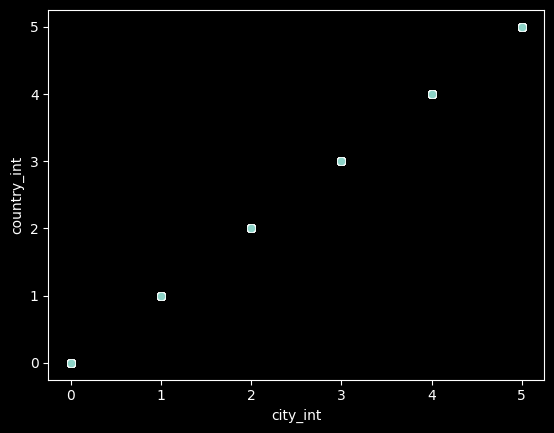

In [23]:
sns.scatterplot(data=hotels, x='city_int', y='country_int')

**hotel_country categorize**

In [24]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 23 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   hotel_address                               386803 non-null  object  
 1   additional_number_of_scoring                386803 non-null  int64   
 2   review_date                                 386803 non-null  object  
 3   average_score                               386803 non-null  int32   
 4   hotel_name                                  386803 non-null  object  
 5   reviewer_nationality                        386803 non-null  object  
 6   negative_review                             386803 non-null  object  
 7   review_total_negative_word_counts           386803 non-null  int64   
 8   total_number_of_reviews                     386803 non-null  int64   
 9   positive_review                             386803 non-null

**days_since_review**

In [25]:
hotels['days_since_review'] = ((pd.to_datetime('2017-08-04')\
    -pd.to_datetime(hotels['review_date']))/ np.timedelta64(1, 'D'))
print(hotels['days_since_review'][0])

532.0


**effing tags (I really really hate 'em)**

In [26]:
def rev_func(num_tags):
    num_tags = num_tags[2:-2]
    res = num_tags.strip().split(' \', \' ')
    return res

hotels['tags_n'] = hotels['tags'].apply(rev_func)

**nights counter**

In [27]:
hotels['nights'] = 1

def nights_counter(tags_listed):
    for i in tags_listed:
        if i[0] == 'S':
            if i[1] == 't':
                if i[2] == 'a':
                    if i[3] == 'y':
                        return int(i[7:9])

hotels['nights'] = hotels['tags_n'].apply(nights_counter)
display(hotels['nights'].describe())

count    386657.000000
mean          2.361571
std           1.646506
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          30.000000
Name: nights, dtype: float64

**cutting off insignificant amount of nights**

In [28]:
#hotels['nights'] = hotels['nights'].astype(int)
hotels['nights'] = hotels['nights'].apply(lambda x: x if x < 14 else 15)
hotels['nights'].value_counts()

1.0     145373
2.0     100263
3.0      72000
4.0      35748
5.0      15611
6.0       7399
7.0       5549
8.0       1910
9.0        966
10.0       663
15.0       624
11.0       306
12.0       217
13.0       174
Name: nights, dtype: int64

**adding popular tags**

In [29]:
hotels['tags'] = hotels['tags'].astype(str).str.lower()

def tag_detect(tags_listed, tag):
    if str(tag) in tags_listed:
            return True
    else: return False
        
tag_list = ['children', 'young', 'without', 'king', 'premier', 'standard', 'superior', 'luxury', 'leisure trip', 'solo', 'view']

for i in tag_list:
    hotels[i] = hotels['tags'].apply(tag_detect, tag = i)
    
# all_tags = list()

# for tag_list in hotels['tags_n']:
#     for i in tag_list:
#         i = i.split()
#         for k in i:
#             all_tags.append(k)

# all_tags = pd.Series(all_tags)

# pd.set_option("display.max_rows", None)
# display(all_tags.value_counts())

In [81]:
hotels['positive_review'] = hotels['positive_review'].astype(str).str.lower()
hotels['negative_review'] = hotels['negative_review'].astype(str).str.lower()

In [82]:
def tag_detect(tags_listed, tag):
    if str(tag) in tags_listed:
            return True
    else: return False
        
tag_list = ['no positive']

for i in tag_list:
    hotels[i] = hotels['positive_review'].apply(tag_detect, tag = i)

In [83]:
def tag_detect(tags_listed, tag):
    if str(tag) in tags_listed:
            return True
    else: return False
        
tag_list = ['no negative']

for i in tag_list:
    hotels[i] = hotels['negative_review'].apply(tag_detect, tag = i)

In [84]:
sns.set(rc={"figure.figsize":(40, 40)})

## ***IT'S A FINAL COUNTDOWN***

In [85]:
hotels.corrwith(hotels['reviewer_score'])

additional_number_of_scoring                 -0.061773
average_score                                 0.363863
review_total_negative_word_counts            -0.383407
total_number_of_reviews                      -0.073389
review_total_positive_word_counts             0.220294
total_number_of_reviews_reviewer_has_given    0.002498
reviewer_score                                1.000000
days_since_review                             0.002408
lat                                          -0.036984
lng                                           0.034829
lat_diff                                      0.008052
lng_diff                                     -0.053375
city_int                                      0.026854
country_int                                   0.026854
nights                                       -0.018672
children                                     -0.014233
young                                        -0.020672
without                                      -0.056660
king      

In [86]:
htl = hotels.copy()

object_columns = [s for s in htl.columns if htl[s].dtypes == 'object']
htl.drop(object_columns, axis = 1, inplace=True)


htl = htl.fillna(0)

htl.drop(['nights', 'days_since_review', 'lat', 'lng', 'lat_diff', 'luxury', 'premier', 'city_int', 'country_int', 'young', 'king','view', 'superior', 'solo'], axis=1, inplace=True)

In [87]:
htl.corrwith(htl['reviewer_score'])

additional_number_of_scoring                 -0.061773
average_score                                 0.363863
review_total_negative_word_counts            -0.383407
total_number_of_reviews                      -0.073389
review_total_positive_word_counts             0.220294
total_number_of_reviews_reviewer_has_given    0.002498
reviewer_score                                1.000000
lng_diff                                     -0.053137
children                                     -0.014233
without                                      -0.056660
standard                                     -0.060620
leisure trip                                  0.117986
no positive                                  -0.251953
no negative                                   0.331416
dtype: float64

In [88]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = htl.drop(['reviewer_score'], axis = 1)  
y = htl['reviewer_score'] 

In [89]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [90]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [91]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96701 entries, 177225 to 152014
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   additional_number_of_scoring                96701 non-null  int64   
 1   average_score                               96701 non-null  int32   
 2   review_total_negative_word_counts           96701 non-null  int64   
 3   total_number_of_reviews                     96701 non-null  int64   
 4   review_total_positive_word_counts           96701 non-null  int64   
 5   total_number_of_reviews_reviewer_has_given  96701 non-null  int64   
 6   city                                        96701 non-null  category
 7   lng_diff                                    96701 non-null  float64 
 8   children                                    96701 non-null  bool    
 9   without                                     96701 non-null  bool  

In [92]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


MAPE: 0.14134178189311136

MAPE: 0.14131385806717026

MAPE: 0.14053156733726535

MAPE: 0.14070534667401732

MAPE: 0.1405255170406278

MAPE: 0.13755135308025937

MAPE: 0.13739329046723142

MAPE: 0.13732568793244715

0.16171777974904125

deleted superior and solo. now it's:

`additional_number_of_scoring                 -0.061773`

`average_score                                 0.363863`

`review_total_negative_word_counts            -0.383407`

`total_number_of_reviews                      -0.073389`

`review_total_positive_word_counts             0.220294`

`total_number_of_reviews_reviewer_has_given    0.002498`

`reviewer_score                                1.000000`

`lng_diff                                     -0.053137`

`without                                      -0.056660`

`standard                                     -0.060620`

`leisure trip                                  0.117986`

0.13996804739741964

added lat\lng

0.14004088547332413


htl.drop(['nights', 'days_since_review', 'lat', 'lng', 'lat_diff', 'luxury', 'premier', 'children', 'nights', 'city_int', 'country_int', 'young', 'king','view', 'superior', 'solo'], axis=1, inplace=True)

0.13994167584614647

htl.drop(['nights', 'days_since_review', 'lat', 'lng', 'lat_diff', 'luxury', 'premier', 'city_int', 'country_int', 'young', 'king','view', 'superior', 'solo'], axis=1, inplace=True)

0.139655038299193

-

0.13952801165719328

with

additional_number_of_scoring                 -0.061773

average_score                                 0.363863

review_total_negative_word_counts            -0.383407

total_number_of_reviews                      -0.073389

review_total_positive_word_counts             0.220294

total_number_of_reviews_reviewer_has_given    0.002498

reviewer_score                                1.000000

lng_diff                                     -0.053137

children                                     -0.014233

without                                      -0.056660

standard                                     -0.060620

leisure trip                                  0.117986

In [93]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13960168703351739


Небольшой бонус:


In [94]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
# object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
# hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
# hotels = hotels.fillna(0)